# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.



We're going to take the following approach:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept,
we'll pursue the project

## 4. Features 

This is where you'll get different info about each of the features in the data.

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We'll be using pandas, Matplotlib and NumPy for data analysis and manipulation.

In [3]:
# Import all the tools that we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# we want our plots to appear inside the notebook

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split , cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/Users/avanidhagam/Desktop/udemy/ml-course/heart_disease_project/env/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

## Load Data

In [11]:
df = pd.read_csv("heart-disease.csv")

In [12]:
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [15]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

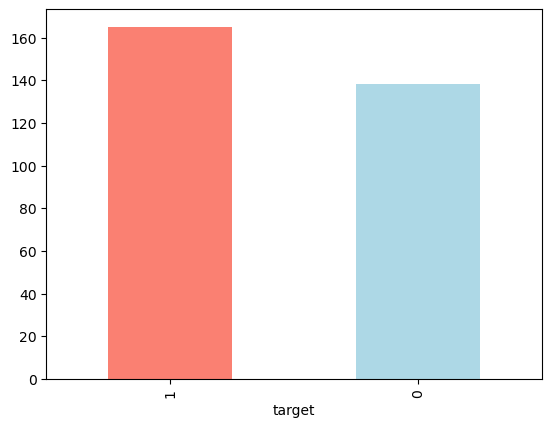

In [16]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Heart disease frequency according to Sex

In [21]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [22]:
# Compare target and sex columns
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

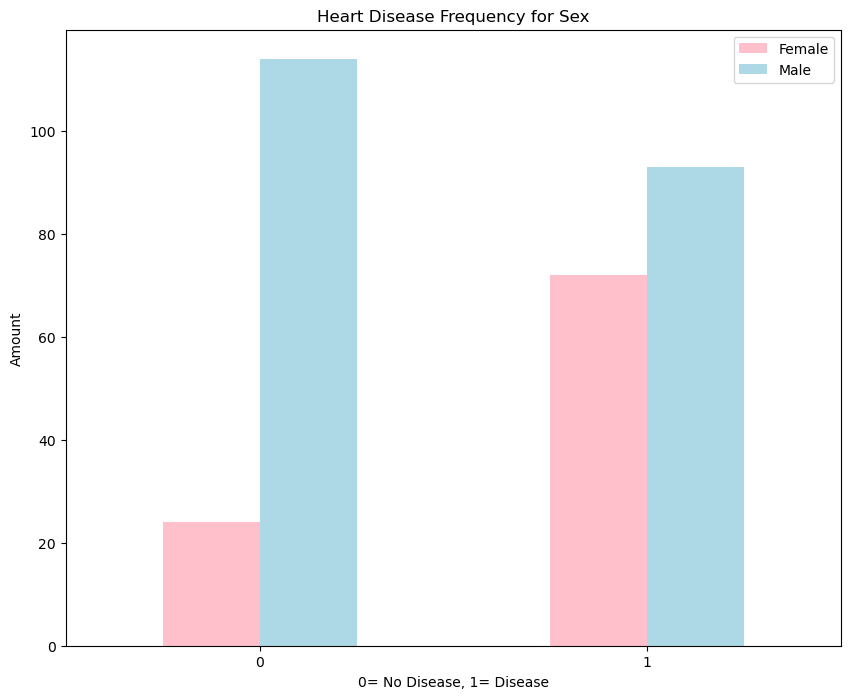

In [23]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,8),
                                  color=["pink","lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

 72 of out 96 females have heart disease, according to the dataset, i.e, 75%
 

### Age vs. Max Heart Rate for Heart Disease

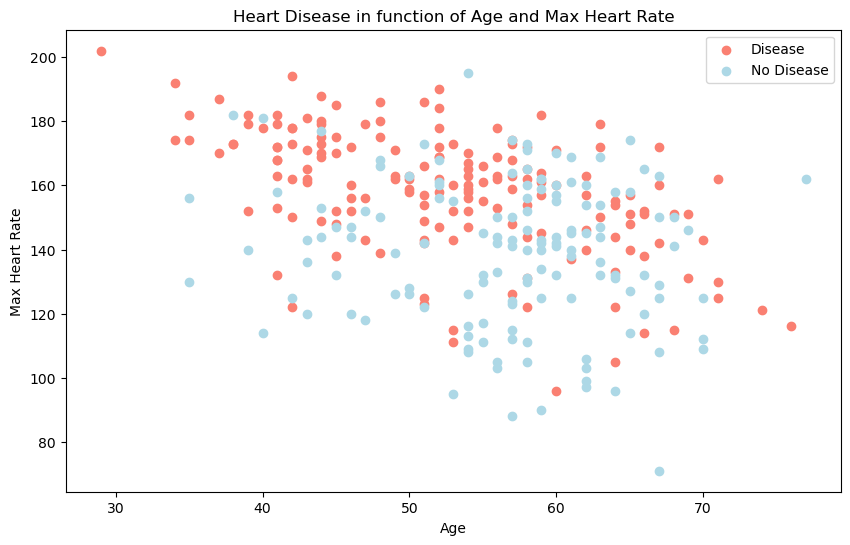

In [24]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           c="lightblue")

# Adding some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])


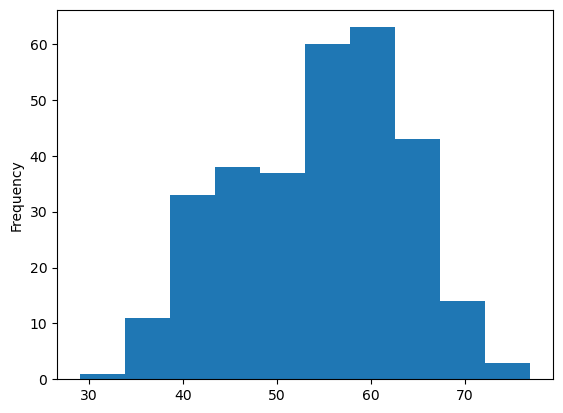

In [25]:
# Check the distribution of the age with a histogram
df.age.plot.hist();

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Heart Disease Frequency per Chest Pain Type

In [27]:
cptype = pd.crosstab(df.cp,df.target)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

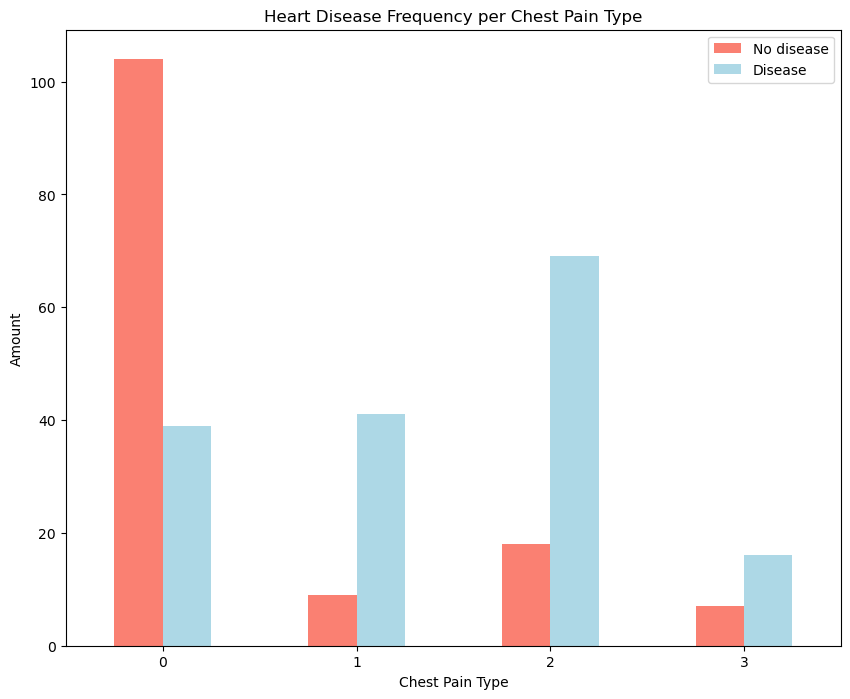

In [28]:
cptype.plot(kind="bar",
           figsize=(10,8),
        color=["salmon","lightblue"])

# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0)

In [29]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


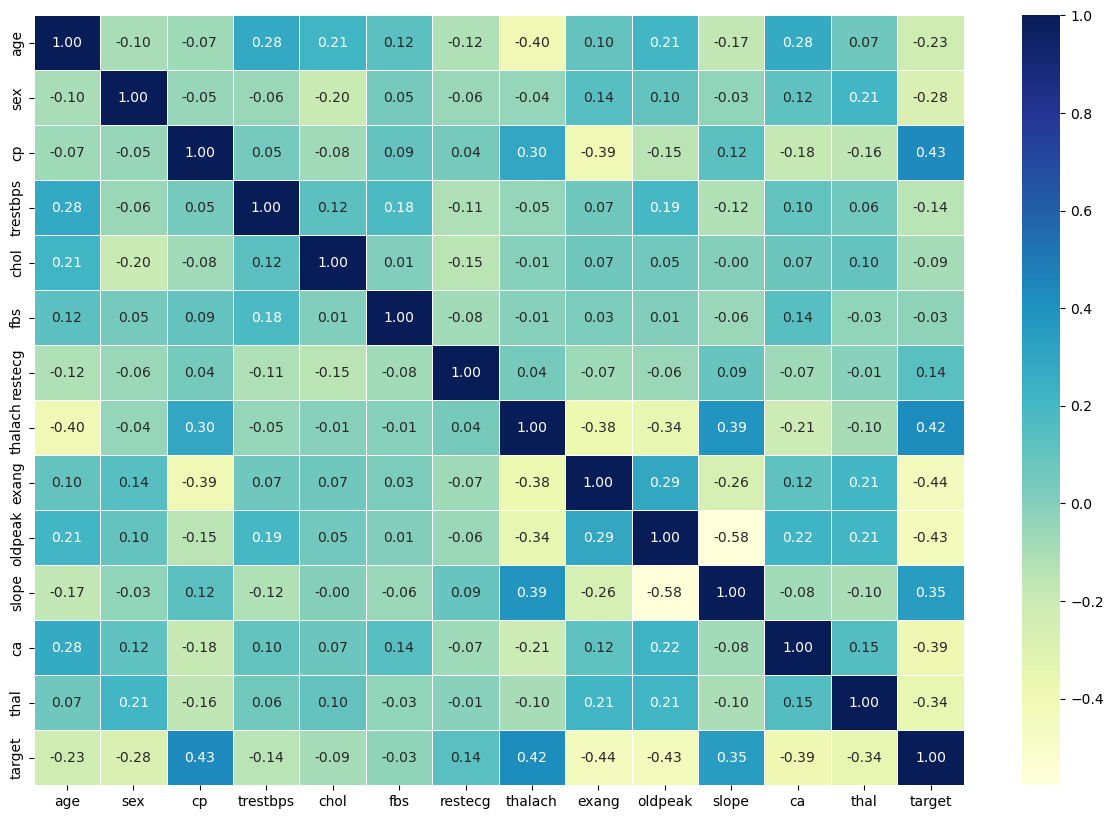

In [30]:
# a prettier correlation matrix
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## 5. Modelling

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
# Split data into X and y
X = df.drop("target",axis=1)

y = df["target"]

In [33]:
np.random.seed(42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [34]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [35]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Building an ML model:

We'll train it (find the patterns) on the training set.

We'll test it (using the patterns found) on the test set.

We're going to try 3 different Machine Learning models:
1. Logistic Regression
2. KNN classifier
3. Random Forest Classifier

In [36]:
# Put models in a dictionary
models = {"Logistic Regression":LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          " Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models , X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    # Make dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # evaluate the model and append its score to the model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores
        
        

In [37]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

/Users/avanidhagam/Desktop/udemy/ml-course/heart_disease_project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 ' Random Forest': 0.8360655737704918}

### Model Comparision

In [38]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


<Axes: >

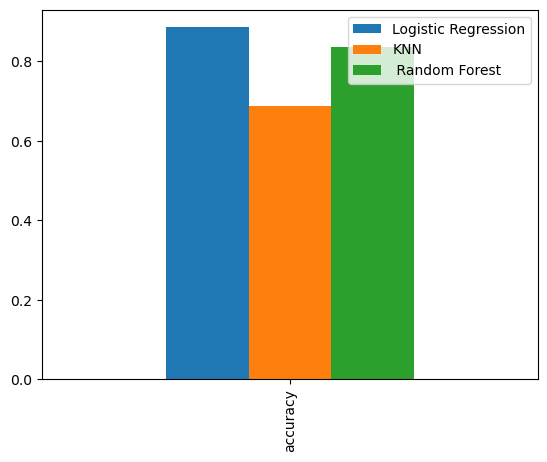

In [39]:
model_compare.plot.bar()

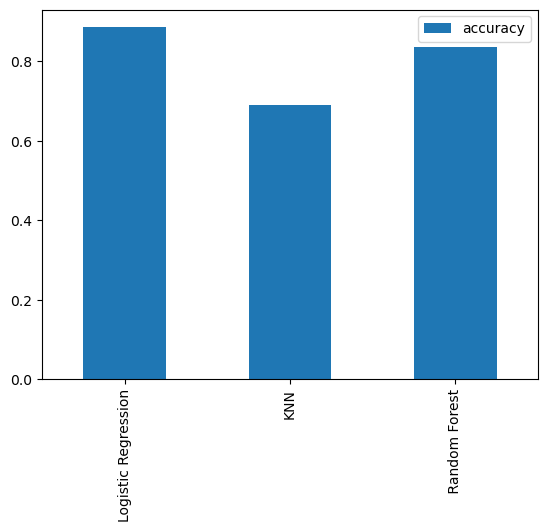

In [40]:
model_compare.T.plot.bar();

Now we've got a baseline model

Let's look at the following:
* Hyperparameter tuning
* feature importance
* Confusion matrix
* Cross-validation
* precision
* recall
* f1 score
* classification report
* ROC curve Area under the curve

#### Hyperparameter Tuning

In [41]:
# Lets tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Fit the algorithm
    knn.fit(X_train,y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))
    

In [42]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [43]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


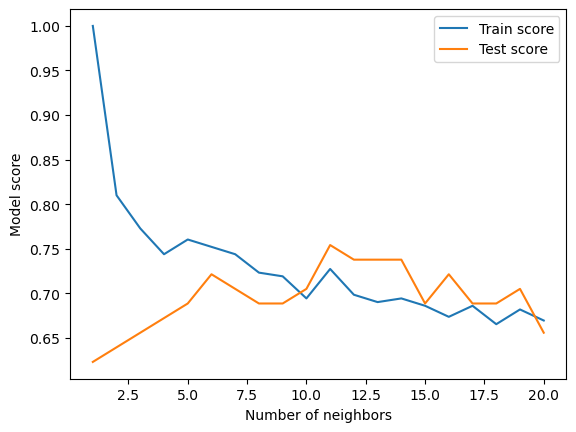

In [44]:
plt.plot(neighbors , train_scores,label = "Train score")
plt.plot(neighbors , test_scores , label = "Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning using RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

In [45]:
# Create A hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4,4,20),
               "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
            "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)}
           

Now we've got hyperparameter grids set up for each of our models, let's tune them using RandomizedSearchCV

In [46]:
# Tune LogisticRegression

np.random.seed(42)

# setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose = True)

# Fit random hyperparameter search for LogisticRegression
rs_log_reg.fit(X_train,y_train)
                                

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [47]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [48]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

got the same as before. ugh 
.Look up more ways to tune hyperparameters for LogisticRegression

In [49]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(estimator = RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True
                            )

# fitting the hyperparameters for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [50]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [51]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparameter Tuning Using GridSearchCV

Since our Logistic Regression model provides the best scores so far , we'll try and improve them 
again using GridSearchCV

In [52]:
# Different hyperparameters for our logisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver" : ["liblinear"]}

# Setup grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameters search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [53]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

also using GridSearch CV for random forest classifier

In [55]:
rf_grid = {"n_estimators": np.arange(50,100, 50),
          
           "min_samples_split": np.arange(2, 21, 2),
           "min_samples_leaf": np.arange(1, 21, 2),
           "max_features": [ "sqrt", "log2"]}

In [56]:
rf_model = RandomForestClassifier()

In [57]:
gs_random_forest = GridSearchCV(RandomForestClassifier(),
                                param_grid=rf_grid,
                                cv=5,
                                verbose=True)

gs_random_forest.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                         'n_estimators': array([50])},
             verbose=True)

In [58]:
gs_random_forest.best_params_

{'max_features': 'log2',
 'min_samples_leaf': 17,
 'min_samples_split': 4,
 'n_estimators': 50}

In [59]:
gs_random_forest.score(X_test,y_test)

0.8688524590163934

## Evaluating our tuned ML classifier , beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

better to use CV whenever possible

In [60]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)


In [61]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [63]:
# plot ROC curve and calculate AUC metric
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_log_reg)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/Users/avanidhagam/Desktop/udemy/ml-course/heart_disease_project/env/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

 let's plot our own ROC Curve

In [64]:
from sklearn.metrics import roc_curve

gs_log_reg.fit(X_train,y_train)

# lets make probability predictions
y_probs = gs_log_reg.predict_proba(X_test)

y_probs[:10]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([[0.86725274, 0.13274726],
       [0.24408505, 0.75591495],
       [0.18547579, 0.81452421],
       [0.94530777, 0.05469223],
       [0.11546644, 0.88453356],
       [0.12929704, 0.87070296],
       [0.39487822, 0.60512178],
       [0.99564019, 0.00435981],
       [0.98623622, 0.01376378],
       [0.43861542, 0.56138458]])

In [65]:
y_probs_positive=y_probs[:,1]
y_probs_positive

array([0.13274726, 0.75591495, 0.81452421, 0.05469223, 0.88453356,
       0.87070296, 0.60512178, 0.00435981, 0.01376378, 0.56138458,
       0.71720801, 0.11904144, 0.88730101, 0.06005038, 0.9675006 ,
       0.93181123, 0.96404702, 0.09452761, 0.01769764, 0.02646362,
       0.71543138, 0.02727602, 0.14274672, 0.71660799, 0.88198278,
       0.6948059 , 0.84234232, 0.69335557, 0.01830938, 0.8778237 ,
       0.07150761, 0.06684154, 0.01510285, 0.14314492, 0.60229489,
       0.12640329, 0.6633502 , 0.85079082, 0.81898323, 0.84121546,
       0.54515818, 0.79250827, 0.7781759 , 0.70538842, 0.83243213,
       0.02113   , 0.73216372, 0.93234387, 0.10276674, 0.06440751,
       0.13470651, 0.03554557, 0.8044197 , 0.95312794, 0.31714639,
       0.00309601, 0.0873472 , 0.93823574, 0.028138  , 0.01309874,
       0.06291751])

In [66]:
# calculate fpr and tpr for roc curve
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

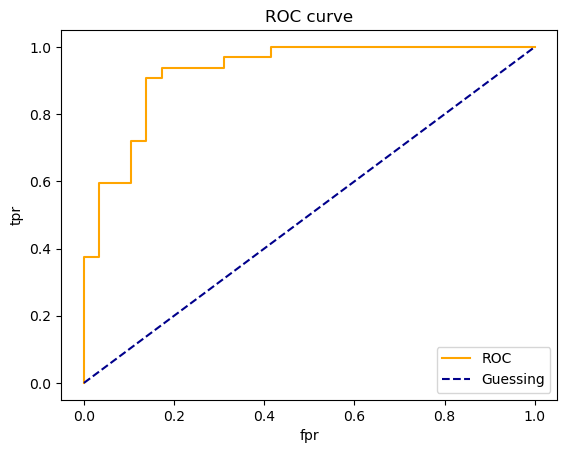

In [67]:
# Creating a function for plotting ROC curves

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

    # Customizing the plot
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [68]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.925646551724138

In [69]:
# Confusion matrix 
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


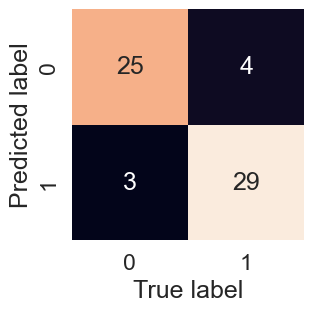

In [70]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    '''Plots a nice looking confusion matrix using Seaborn's heatmap()
    '''

    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                annot=True,
                 cbar = False
                )
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

Let's now get a classification report, cross-validated precision, recall and an F1-score.

In [71]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



precision : proportion of when the model predicts class 1 and its actually correct. A model that has no false positive has a precision score of 1.

recall : actual positives that were correctly classified. Overall, the no. of positives that were correctly classified.


### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1 score of our model using cross-validation and we'll be using `cross-val-score()`

In [72]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [73]:
# Create a new classifier with the best parameters
clf = LogisticRegression(C= 0.20433597178569418,solver= 'liblinear')

In [74]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [75]:
# Cross validated recall
cv_rec = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [76]:
# Cross validated precision
cv_pre = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [77]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

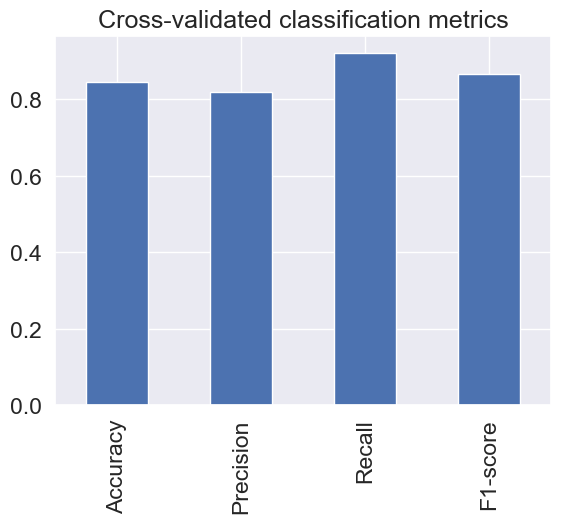

In [78]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_pre,
                           "Recall":cv_rec,
                           "F1-score":cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

Finding out which features contributed most to the model and how did they contribute

Finding feature importance is different for each machine learning model.

In [79]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's find feature importance for our Logistic Regression Model...

In [80]:
# Fit an instance of logistic regression

clf = LogisticRegression(C= 0.20433597178569418,solver= 'liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [81]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [82]:
# Match coefs of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

In [83]:
feature_dict = {col:coef for col,coef in zip(df.columns,clf.coef_[0])}
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

<Axes: title={'center': 'Feature Importance'}>

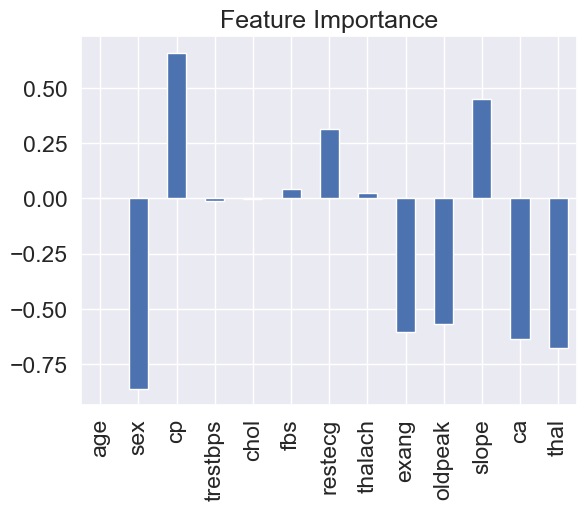

In [84]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend = False)

index=[0] is used to create a single row dataFrame

In [85]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


## 6. Experimentation

* Try better models like CatBoost,XGBoost, ExtraTrees

In [86]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

models_dict ={ "catboost": CatBoostClassifier(verbose=False),
              "XGBoost": XGBClassifier(),
               "extree":ExtraTreesClassifier()}

model_scores = fit_and_score(models_dict, X_train,X_test,y_train,y_test)
model_scores

{'catboost': 0.8360655737704918,
 'XGBoost': 0.819672131147541,
 'extree': 0.8524590163934426}

In [87]:
from sklearn.model_selection import KFold

gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)



# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini','entropy'],
    'max_depth': [5,6],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier(random_state=42)

gsearch = GridSearchCV(
    estimator = extree_estimator,
    param_grid = params,
    scoring = 'f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=False)

extree_model = gsearch.fit(X_train,y_train)

In [88]:
gsearch.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_split': 3,
 'n_estimators': 300}

In [89]:
extree_model.score(X_test,y_test)

0.8851220105749872

In [90]:
# Creating a classifier with the best parameters 
clf2 = ExtraTreesClassifier(ccp_alpha= 0.0,
 criterion= 'gini',
 max_depth=6,
 min_samples_split= 3,
 n_estimators= 300)


In [91]:
# Cross validated accuracy
cv_acc = cross_val_score(clf2,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [92]:
# cross validated recall
cv_rec = cross_val_score(clf2,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.8969696969696971

In [93]:
# Cross validated precision
cv_prec = cross_val_score(clf2,
                          X,
                          y,
                          cv=5,
                          scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.8431430408660011

In [94]:
# f1 score
cv_f1 = cross_val_score(clf2,
                        X,
                        y,
                        cv=5,
                        scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8625081002550274

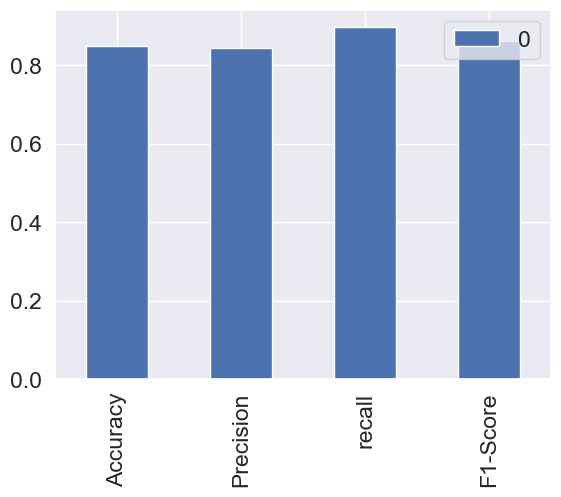

In [95]:
cv_extree_metrics = pd.DataFrame({"Accuracy":cv_acc,
                                  "Precision":cv_prec,
                                  "recall":cv_rec,
                                  "F1-Score":cv_f1},
                                index=[0])
cv_extree_metrics.T.plot(kind="bar");

array([ 50, 100, 150, 200, 250, 300])